# Micro-Credit Defaulter Model

### Importing Required Libraries/Modules:-

In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import boxcox
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category=DeprecationWarning)

### Loading Dataset:-

In [181]:
data = pd.read_csv('Data file.csv')

In [182]:
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In the given data we can remove unamed index column explicitly

In [183]:
data = data.drop(data.columns[0], axis=1)

In [184]:
data = data.drop(['pcircle','msisdn','pdate'], axis=1)

In [185]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


## Data Cleaning/EDA :-

We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the shape property

In [186]:
data.shape

(209593, 33)

#### Checking Null values:-

In [187]:
data.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

There are no null values observed, however we can confirm with bar map

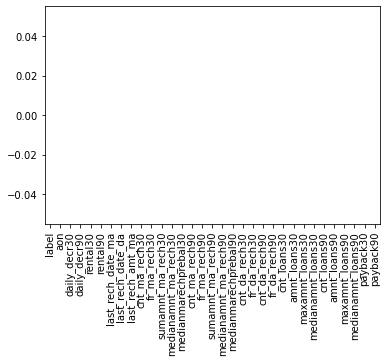

In [188]:
data.isnull().sum().plot(kind="bar")

from the both bar chart and null check as we find there are no null values in the data set because the red color is distributed equally entire the heatmap.

In [189]:
print(data.dtypes) 
#It Tells us about the data Types of all the feature in the data

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

In [190]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [191]:
col_names=data.columns
col_names

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [192]:
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [193]:
for cols in data.columns.tolist()[1:]:
    data = data[(data[cols] >= 0)]

In [194]:
data.shape

(197333, 33)

## Data Visualization

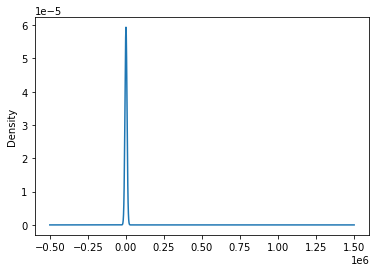

In [195]:
data.aon.plot(kind='density')
plt.show()

In [196]:
correlations = data.corr()
correlations

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003084,0.166210,0.164290,0.056872,0.074154,0.003752,0.000927,0.122963,0.230656,...,0.191296,0.192539,0.000210,0.042656,0.004770,0.196059,0.082707,0.033697,0.043619,0.044385
aon,-0.003084,1.000000,0.000893,0.000146,-0.000918,-0.000861,0.002009,-0.001501,0.003296,-0.003521,...,-0.002532,-0.002529,-0.002569,0.005262,-0.000703,-0.003027,-0.001448,0.003300,0.002480,0.002699
daily_decr30,0.166210,0.000893,1.000000,0.977375,0.438233,0.455331,-0.000255,-0.002039,0.302765,0.448582,...,0.361466,0.468083,0.000308,-0.011767,0.009194,0.559165,0.397989,-0.037234,0.021480,0.040829
daily_decr90,0.164290,0.000146,0.977375,1.000000,0.430549,0.468159,0.000179,-0.002326,0.290464,0.423500,...,0.335330,0.444064,0.000303,-0.005539,0.009672,0.562920,0.395110,-0.034525,0.014037,0.034647
rental30,0.056872,-0.000918,0.438233,0.430549,1.000000,0.954293,-0.001811,0.002967,0.157933,0.230271,...,0.175427,0.229104,-0.000895,-0.016973,0.004356,0.293257,0.232382,-0.035850,0.068596,0.089509
rental90,0.074154,-0.000861,0.455331,0.468159,0.954293,1.000000,-0.002593,0.002446,0.150329,0.226238,...,0.165949,0.226896,-0.001553,-0.009696,0.005481,0.321803,0.249467,-0.034351,0.062435,0.093897
last_rech_date_ma,0.003752,0.002009,-0.000255,0.000179,-0.001811,-0.002593,1.000000,0.001994,0.000355,0.004004,...,0.000820,0.000456,0.001161,0.001940,-0.000026,0.000322,-0.001771,0.002972,-0.002940,-0.002451
last_rech_date_da,0.000927,-0.001501,-0.002039,-0.002326,0.002967,0.002446,0.001994,1.000000,0.000200,0.001090,...,0.000043,0.000093,0.000144,-0.000717,-0.000791,-0.000132,0.001260,-0.003201,-0.000035,0.000393
last_rech_amt_ma,0.122963,0.003296,0.302765,0.290464,0.157933,0.150329,0.000355,0.000200,1.000000,-0.003012,...,-0.027309,0.012508,0.001026,0.028644,0.001463,0.021154,0.161097,0.019953,-0.025135,-0.010021
cnt_ma_rech30,0.230656,-0.003521,0.448582,0.423500,0.230271,0.226238,0.004004,0.001090,-0.003012,1.000000,...,0.764590,0.750675,0.000582,-0.068619,0.013926,0.682949,0.170518,-0.072460,0.036711,0.008952


### Data Balance Check

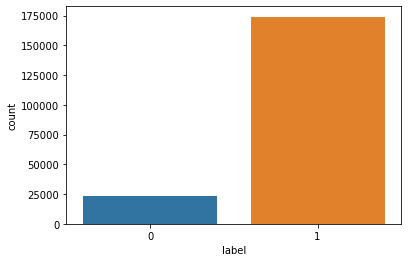

In [197]:
sns.countplot(data['label'])

## Data Visualization

#### Label vs medianamnt_loans30

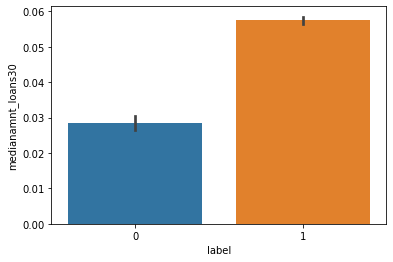

In [198]:
sns.barplot(x='label',y='medianamnt_loans30',data=data)
plt.show()

#### Label vs maxamnt_loans90

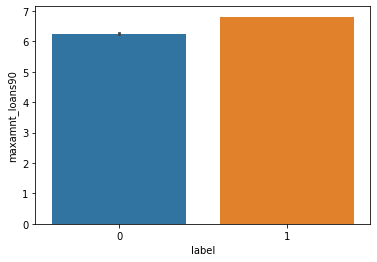

In [199]:
sns.barplot(x='label',y='maxamnt_loans90',data=data)
plt.show()

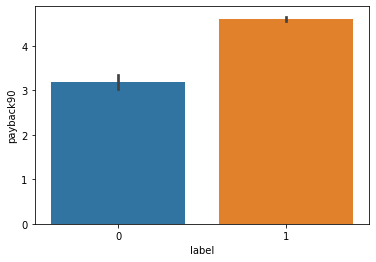

In [200]:
sns.barplot(x='label',y='payback90',data=data)
plt.show()

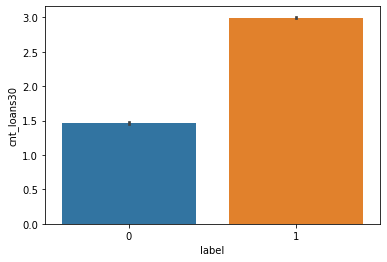

In [201]:
sns.barplot(x='label',y='cnt_loans30',data=data)
plt.show()

### Feature Selection (Logistic Regression)

In [202]:
Xsel=data.iloc[:,2:34]
Ysel=data.iloc[:,0]

In [203]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures=SelectKBest(score_func=chi2,k=20)

In [204]:
fit=bestfeatures.fit(Xsel,Ysel)

In [205]:
datascores=pd.DataFrame(fit.scores_)
datacolumns=pd.DataFrame(Xsel.columns)

In [206]:
featureScores=pd.concat([datacolumns,datascores],axis=1)
featureScores.columns=['Specs','Score']
featureScores

,Specs,Score
0,daily_decr30,8.548586e+07
1,daily_decr90,1.037457e+08
2,rental30,4.299488e+06
3,rental90,1.015372e+07
4,last_rech_date_ma,2.150183e+06
5,last_rech_date_da,1.301914e+05
6,last_rech_amt_ma,7.631857e+06
7,cnt_ma_rech30,4.763141e+04
8,fr_ma_rech30,2.252767e+04
9,sumamnt_ma_rech30,9.934864e+07


In [207]:
print(featureScores.nlargest(20,"Score"))

                   Specs         Score
14     sumamnt_ma_rech90  1.798645e+08
1           daily_decr90  1.037457e+08
9      sumamnt_ma_rech30  9.934864e+07
0           daily_decr30  8.548586e+07
3               rental90  1.015372e+07
10  medianamnt_ma_rech30  7.675815e+06
6       last_rech_amt_ma  7.631857e+06
15  medianamnt_ma_rech90  5.281671e+06
2               rental30  4.299488e+06
4      last_rech_date_ma  2.150183e+06
11  medianmarechprebal30  2.033104e+06
16  medianmarechprebal90  3.380541e+05
26          amnt_loans90  2.259046e+05
17         cnt_da_rech30  2.258762e+05
5      last_rech_date_da  1.301914e+05
22          amnt_loans30  1.240272e+05
12         cnt_ma_rech90  8.612652e+04
18          fr_da_rech30  7.493082e+04
7          cnt_ma_rech30  4.763141e+04
8           fr_ma_rech30  2.252767e+04


In [208]:
colnames=["label","sumamnt_ma_rech90","daily_decr90","sumamnt_ma_rech30","daily_decr30","rental90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","rental30","medianmarechprebal30","aon","medianmarechprebal90","amnt_loans90","cnt_da_rech30","amnt_loans30","cnt_ma_rech90","cnt_ma_rech30","last_rech_date_ma","fr_ma_rech30","fr_ma_rech90"]
len(colnames)

21

In [209]:
data.shape

(197333, 33)

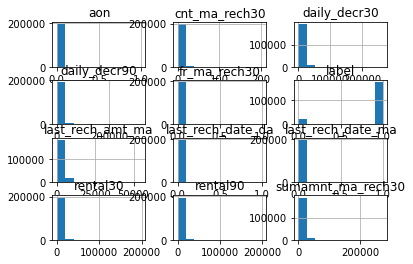

In [210]:
hist = data.iloc[:,0:12].hist()

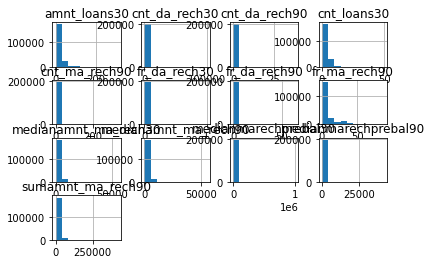

In [211]:
hist = data.iloc[:,12:25].hist()

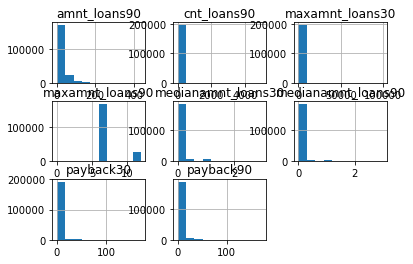

In [212]:
hist = data.iloc[:,25:35].hist()

In [213]:
### Filter dataframe to use only important features
df=data[colnames]   #includes Target variable "Label"
df1=df.iloc[:,1:]   #does not include Target variable "Label"
df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,3078,3065.150000,3078.0,3055.050000,260.13,1539.0,1539,1539.0,220.13,7.50,272.0,7.50,12,0.0,12,2,2,2.0,21.0,21
1,5787,12124.750000,5787.0,12122.000000,3691.26,5787.0,5787,5787.0,3691.26,61.04,712.0,61.04,12,0.0,12,1,1,20.0,0.0,0
2,1539,1398.000000,1539.0,1398.000000,900.13,1539.0,1539,1539.0,900.13,66.32,535.0,66.32,6,0.0,6,1,1,3.0,0.0,0
3,947,21.228000,0.0,21.228000,159.42,0.0,947,947.0,159.42,0.00,241.0,2.50,12,0.0,12,1,0,41.0,0.0,0
4,23496,150.619333,20029.0,150.619333,1098.90,2309.0,2309,2888.0,1098.90,29.00,947.0,35.00,42,0.0,42,8,7,4.0,2.0,2


## Normalizing Data

In [214]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(df1) 
df1.loc[:,:] = scaled_values

In [215]:
df1.head()

,sumamnt_ma_rech90,daily_decr90,sumamnt_ma_rech30,daily_decr30,rental90,medianamnt_ma_rech30,last_rech_amt_ma,medianamnt_ma_rech90,rental30,medianmarechprebal30,aon,medianmarechprebal90,amnt_loans90,cnt_da_rech30,amnt_loans30,cnt_ma_rech90,cnt_ma_rech30,last_rech_date_ma,fr_ma_rech30,fr_ma_rech90
0,0.007361,0.009560,0.011192,0.011488,0.001300,0.027982,0.027982,0.027982,0.001107,0.000008,0.000271,0.000181,0.027397,0.0,0.039216,0.005952,0.009852,0.000002,0.000021,0.238636
1,0.013840,0.037815,0.021043,0.045584,0.018443,0.105218,0.105218,0.105218,0.018556,0.000061,0.000711,0.001472,0.027397,0.0,0.039216,0.002976,0.004926,0.000020,0.000000,0.000000
2,0.003681,0.004360,0.005596,0.005257,0.004497,0.027982,0.027982,0.027982,0.004525,0.000066,0.000534,0.001600,0.013699,0.0,0.019608,0.002976,0.004926,0.000003,0.000000,0.000000
3,0.002265,0.000066,0.000000,0.000080,0.000797,0.000000,0.017218,0.017218,0.000801,0.000000,0.000240,0.000060,0.027397,0.0,0.039216,0.002976,0.000000,0.000041,0.000000,0.000000
4,0.056193,0.000470,0.072830,0.000566,0.005490,0.041982,0.041982,0.052509,0.005524,0.000029,0.000946,0.000844,0.095890,0.0,0.137255,0.023810,0.034483,0.000004,0.000002,0.022727


#### Defining Dependent and independent variable

In [216]:
''''X = data.drop(['label'], axis=1)
Y=data['label']'''

"'X = data.drop(['label'], axis=1)\nY=data['label']"

In [217]:
X = df1
Y=data['label']

#### Split data

In [218]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 7)

## 1. Logistic Regression

In [219]:
lr = LogisticRegression(solver='lbfgs', max_iter=400) 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.45      0.00      0.01      7039
           1       0.88      1.00      0.94     52161

    accuracy                           0.88     59200
   macro avg       0.67      0.50      0.47     59200
weighted avg       0.83      0.88      0.83     59200



In [220]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 121847
Before OverSampling, counts of label '0': 16286 

After OverSampling, the shape of train_X: (243694, 20)
After OverSampling, the shape of train_y: (243694,) 

After OverSampling, counts of label '1': 121847
After OverSampling, counts of label '0': 121847


In [221]:
lr1 = LogisticRegression(solver='lbfgs', max_iter=400) 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test)

In [222]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 5694  1345]
 [16650 35511]]
              precision    recall  f1-score   support

           0       0.25      0.81      0.39      7039
           1       0.96      0.68      0.80     52161

    accuracy                           0.70     59200
   macro avg       0.61      0.74      0.59     59200
weighted avg       0.88      0.70      0.75     59200



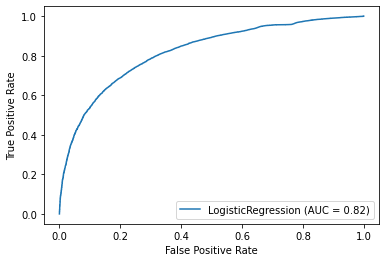

In [223]:
import sklearn.metrics as metrics
metrics.plot_roc_curve(lr1, X_test, y_test) 
plt.show()

## 2. Decision Tree

In [224]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_res,y_train_res)
y_pred1 = clf.predict(X_test)

In [225]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[ 3869  3170]
 [ 6151 46010]]
              precision    recall  f1-score   support

           0       0.39      0.55      0.45      7039
           1       0.94      0.88      0.91     52161

    accuracy                           0.84     59200
   macro avg       0.66      0.72      0.68     59200
weighted avg       0.87      0.84      0.85     59200



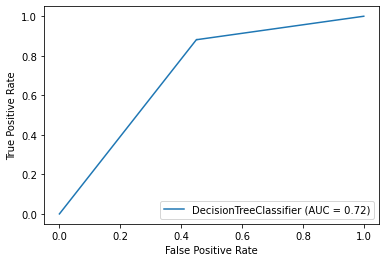

In [226]:
import sklearn.metrics as metrics
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

## 3. Random Forest

In [227]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X_train_res,y_train_res)
y_pred2=rfc.predict(X_test)

In [228]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[ 3991  3048]
 [ 3217 48944]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      7039
           1       0.94      0.94      0.94     52161

    accuracy                           0.89     59200
   macro avg       0.75      0.75      0.75     59200
weighted avg       0.90      0.89      0.89     59200



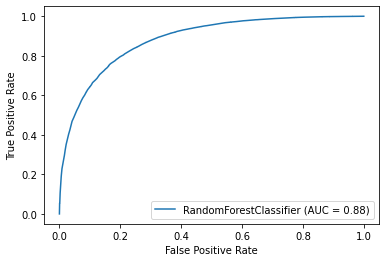

In [229]:
metrics.plot_roc_curve(rfc, X_test, y_test) 
plt.show()

## 4. Gradient Boost Classifier

In [230]:

gbc = GradientBoostingClassifier()
gbc.fit(X_train_res,y_train_res)
y_pred3=gbc.predict(X_test)

In [231]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[ 4970  2069]
 [ 9194 42967]]
              precision    recall  f1-score   support

           0       0.35      0.71      0.47      7039
           1       0.95      0.82      0.88     52161

    accuracy                           0.81     59200
   macro avg       0.65      0.76      0.68     59200
weighted avg       0.88      0.81      0.83     59200



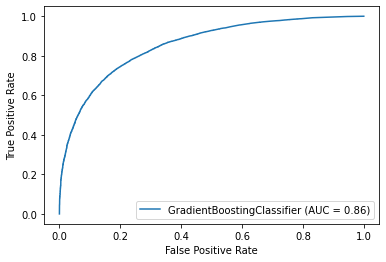

In [232]:
metrics.plot_roc_curve(gbc, X_test, y_test) 
plt.show()

#### From the above 4 models, we can identify that "RandomForestClassifier" is the best model with AUC score = 89%

let us finalize the model

In [233]:
from sklearn.model_selection import validation_curve
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_res, y = y_train_res, 
                                param_name = 'n_estimators', 
                                param_range = range(1,5), cv = 3)

In [234]:
len(train_scoreNum)

4

In [235]:
len(test_scoreNum)

4

In [236]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15,     n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1)

In [237]:
modelOpt = forestOpt.fit(X_train_res, y_train_res)
y_predf=modelOpt.predict(X_test)

In [238]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predf))
print(classification_report(y_test,y_predf))

[[ 4656  2383]
 [ 5504 46657]]
              precision    recall  f1-score   support

           0       0.46      0.66      0.54      7039
           1       0.95      0.89      0.92     52161

    accuracy                           0.87     59200
   macro avg       0.70      0.78      0.73     59200
weighted avg       0.89      0.87      0.88     59200



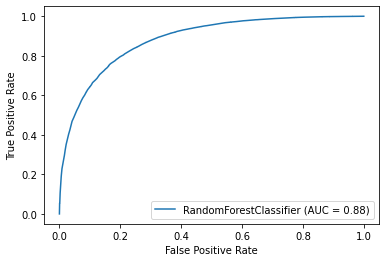

In [239]:
metrics.plot_roc_curve(rfc, X_test, y_test) 
plt.show()